# NS-3_part1_03735990

In [7]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np

In [8]:
def readFileExtPath( ext):
    temp = {}
    if ext == "*.cwnd":
        colmn = ["Time", "OldCwnd", "NewCwnd"]
    else:
        colmn = ["Time"]
    filepattern = sorted(glob.glob(ext))
    for file in filepattern:
        df = pd.read_csv(file, delim_whitespace=True, header=None, index_col=None, names = colmn)
        temp[file] = df
    return temp

In [9]:
cwnd = readFileExtPath("*.cwnd")
rxdrop = readFileExtPath("*.rxdrop")

## 7.1 Single TCP flow: Impact of transmission errors and delay

### Task 7.1.4: Simulation study

In [10]:
def plotCongestion(cwndlist,rxdroplist, delay):
    if delay:
        for filename, frame in cwndlist.items():
            
            if "10ms" in filename:
                rxname = filename.replace("cwnd", "rxdrop")
                rxframe = rxdroplist[rxname]
                plt.figure(figsize=(20, 5))
                plt.suptitle(filename)
                plt.plot(frame["Time"], frame["NewCwnd"], color='b')
                plt.plot(rxframe["Time"],np.zeros(len(rxframe["Time"])), 'ro', label='Dropped Packets')
                plt.xlabel("RTT")
                plt.ylabel("Congestion Window")
                plt.legend()

    else:
        for filename, frame in cwndlist.items():
            if "0.00001" in filename:
                rxname = filename.replace("cwnd", "rxdrop")
                rxframe = rxdroplist[rxname]
                plt.figure(figsize=(20, 5))
                plt.suptitle(filename)
                plt.plot(frame["Time"], frame["NewCwnd"], color='b')
                plt.plot(rxframe["Time"],np.zeros(len(rxframe["Time"])), 'ro', label='Dropped Packets')
                plt.xlabel("RTT")
                plt.ylabel("Congestion Window")
                plt.legend()

    
def plotCongestionCombined(cwndlist, delay):
    plt.figure(figsize=(20, 10))
    plt.suptitle("Combined Plot")
    if delay:
        for filename, frame in cwndlist.items():
            if "10ms" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    else:
        for filename, frame in cwndlist.items():
            if "0.00001" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    plt.xlabel("RTT")
    plt.ylabel("Congestion Window")
    plt.legend()

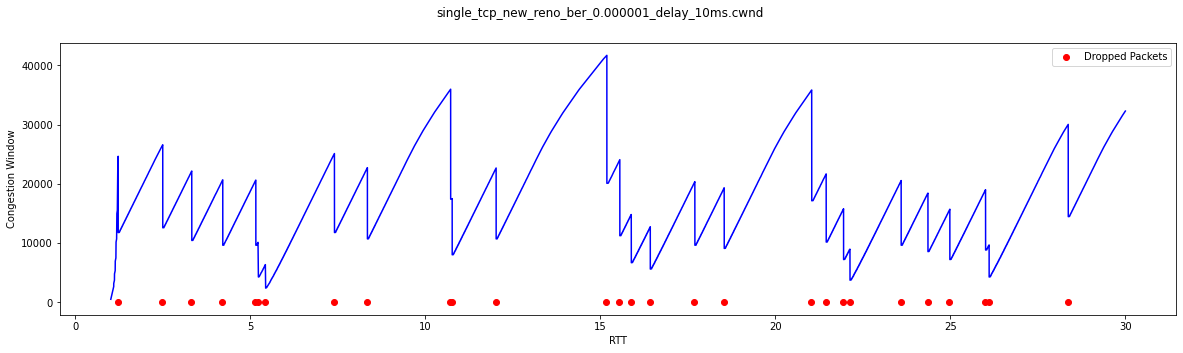

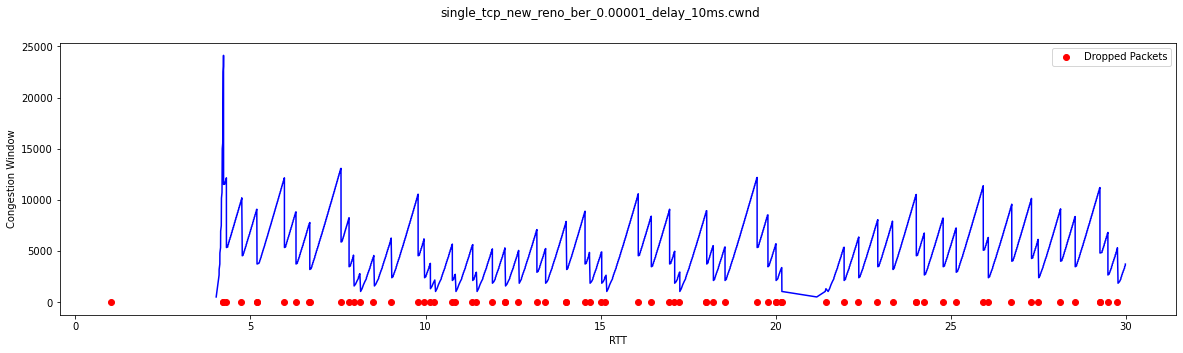

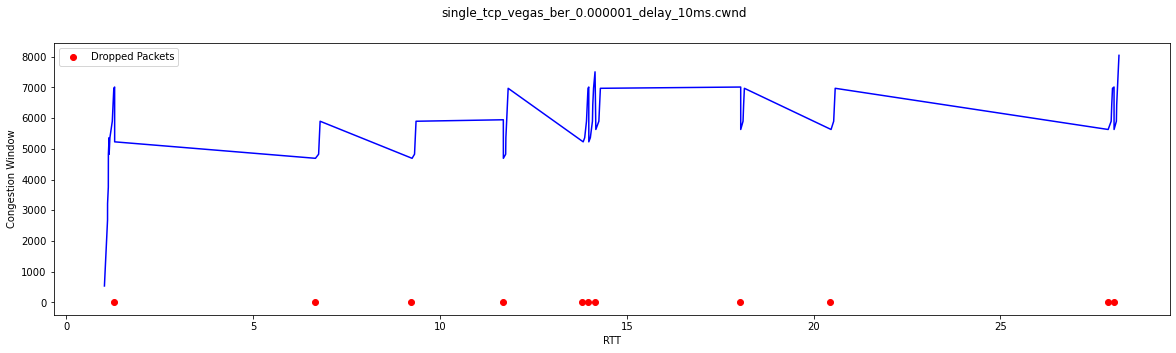

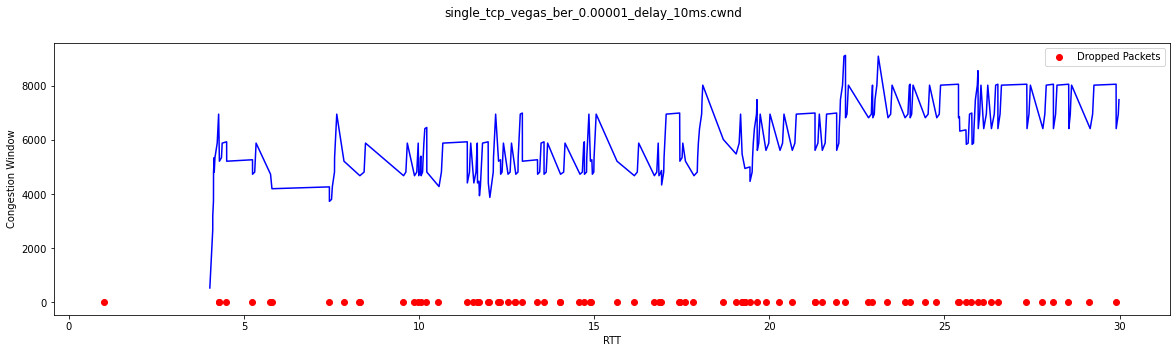

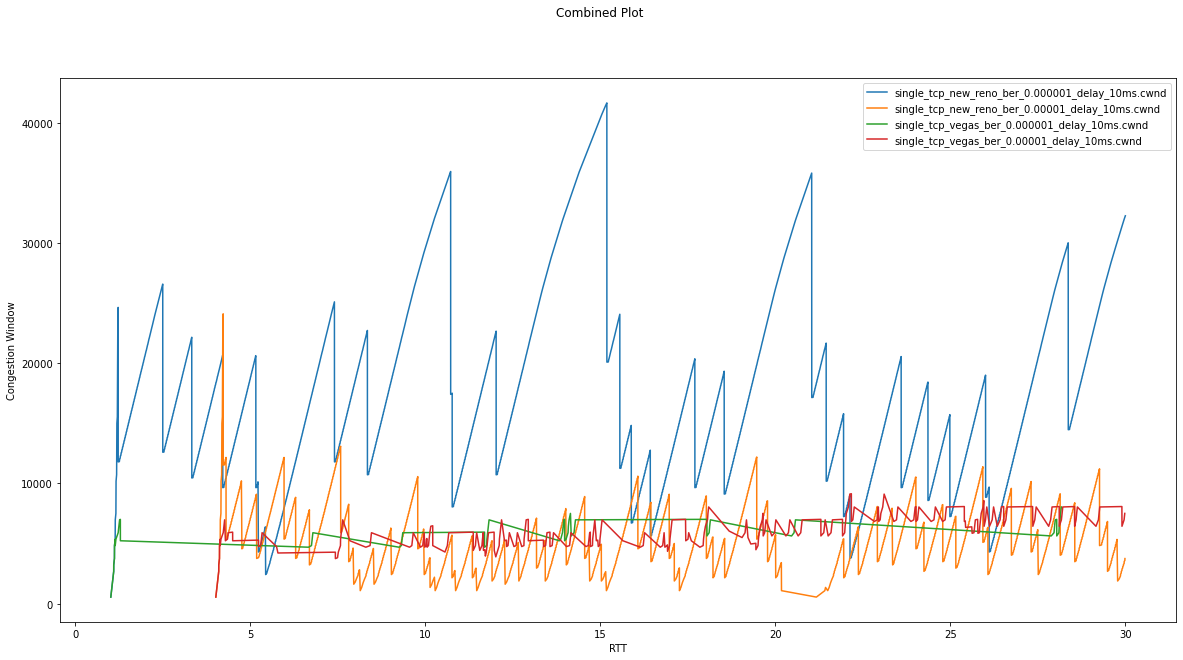

In [5]:
# Task 7.1.4: Simulation study at Link Delay = 10ms
plotCongestion(cwnd,rxdrop, True)
plotCongestionCombined(cwnd, True)

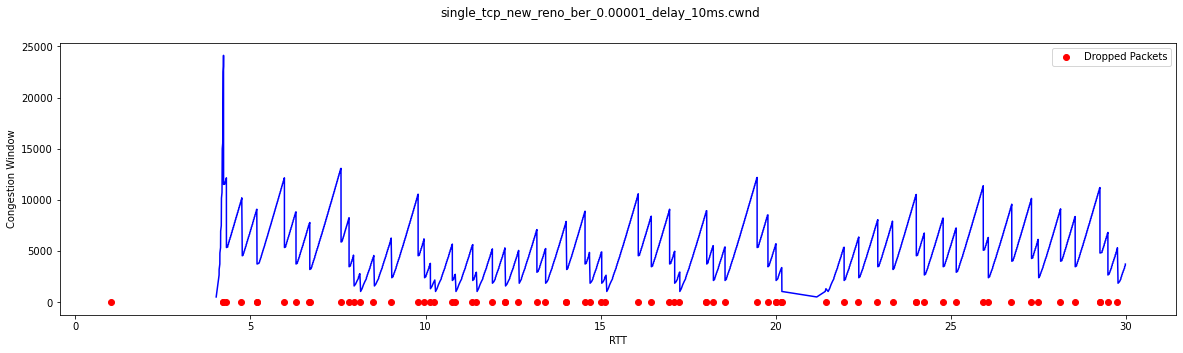

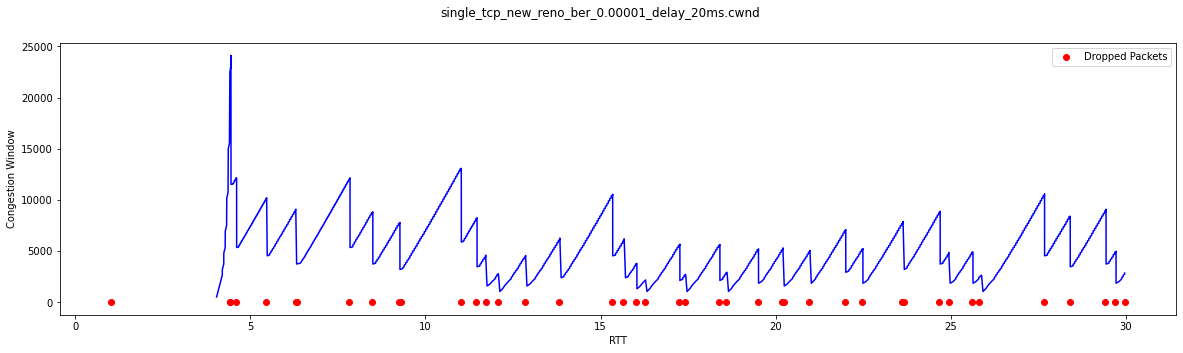

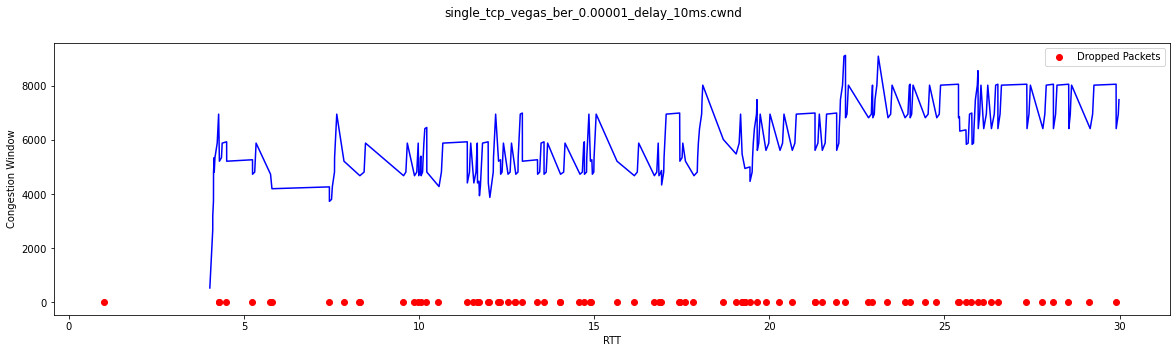

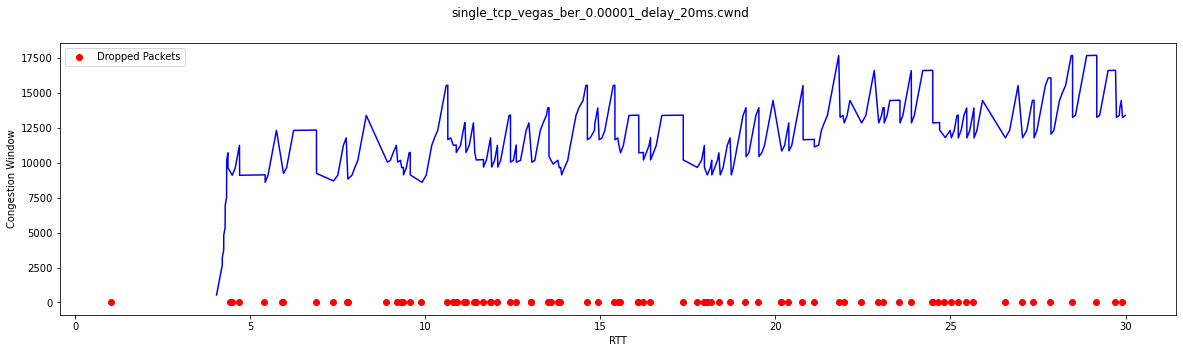

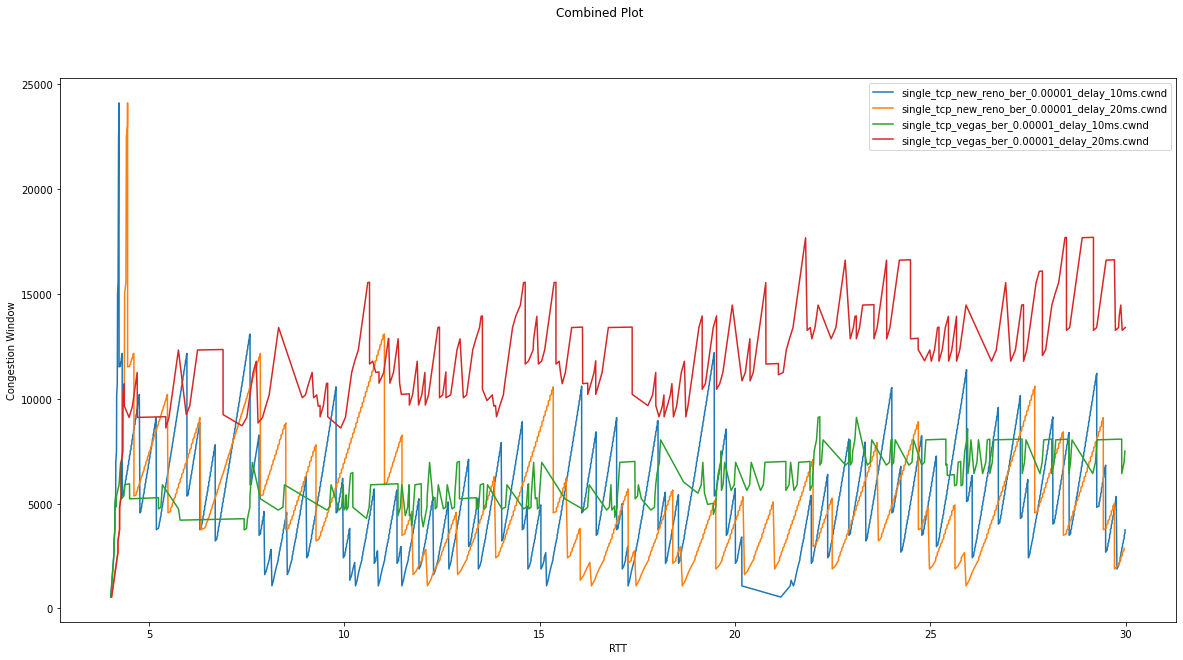

In [11]:
# Task 7.1.4: Simulation study at BER = 10e-5

plotCongestion(cwnd,rxdrop, False)
plotCongestionCombined(cwnd,  False)

### Task 7.1.5: Analysis

First four plots shows the Congestion for each tcp variant and BER at 10ms delay. Later on we have a combined plot for 10ms delay. The next four plots are fixed at BER of 10e-5 followed by a combined plot.

Fixed Delay at 10ms : For New Reno the overall congestion window is reduced with increased BER which is obvious as the algorithm decreases its window size on experiencing a drop in the system, i.e. it detects and control the congestion.

Vegas on the other end detects congestion without actually causing a congestion by using the packet delay as its parameter to detect congestion, and hence there is no overall reduction in congestion window for this variant. The Flatness in Congestion Plot for Vegas variant is present because it tries to maintain the utilization bandwidth by keeping them in a particular range without overloading the network.

New Reno has a over all higher window size than the Vegas variant of TCP because of controlling of bandwidth by Vegas, However it can be seen that Vegas never reaches Window size near to 1 whereas the former has a large fluctuations in window size because of same reason.

Also, for a given TCP variant, increase in BER increases the drop rate.

FixedBER at 10e-5*: New Reno: Increment in link delay reduces the number of lost packets in the system without having affect in overall window size. Vegas: Increment in delay doesn't have any effect on packet losses, but the performance is increased i.e. the Vegas with 20ms link delay has significantly higher Congestion window size.

Overall Vegas outperforms the New Reno on increasing delay. The Network is more stable and an upward trend is observed in the Congestion window plot.

## 7.2 Multiple flows: Impact of link delay and algorithm on fair share behavior

In [12]:
# Task 7.2.3: Simulation Study I

def plotFlowCongestion(cwndlist, bic=False, delay=False):
    plt.figure(figsize=(20, 5))
    if not delay and bic:
        plt.suptitle("BIC Flow")
        for filename, frame in cwndlist.items():
            if "723_BIC" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    elif not delay and not bic:
        plt.suptitle("New Reno Flow")
        for filename, frame in cwndlist.items():
            if "723_new_reno" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    elif delay and bic:
        plt.suptitle("BIC Flow")
        for filename, frame in cwndlist.items():
            if "725_BIC" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    else:
        plt.suptitle("New Reno Flow")
        for filename, frame in cwndlist.items():
            if "725_new_reno" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    plt.xlabel("RTT")
    plt.ylabel("Congestion Window")
    plt.legend()
    
def plotFlowCongestionCombined(cwndlist, delay=False):
    plt.figure(figsize=(20, 10))
    plt.suptitle("Combined Plot")
    if not delay:
        for filename, frame in cwndlist.items():
            if "723" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    else:
        for filename, frame in cwndlist.items():
            if "725" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    plt.xlabel("RTT")
    plt.ylabel("Congestion Window")
    plt.legend()

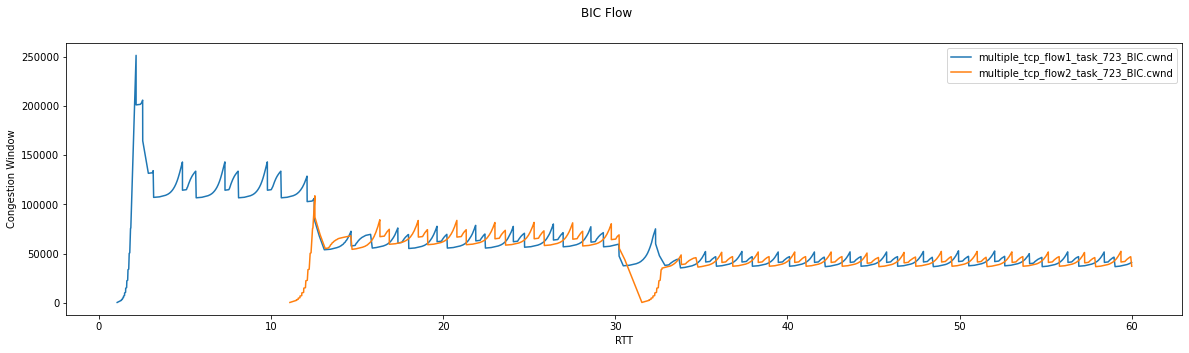

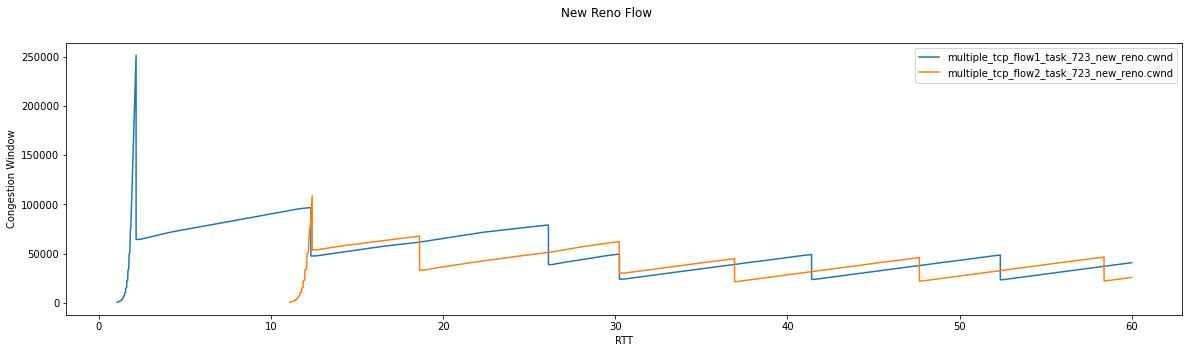

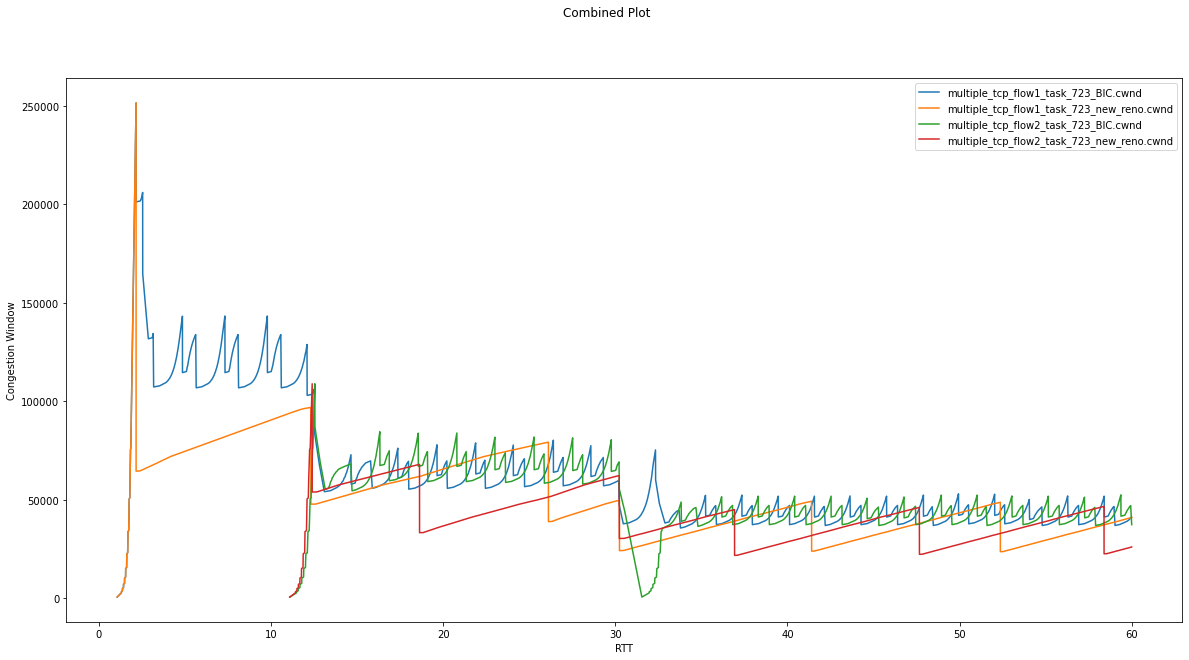

In [13]:
# Task 7.2.3: Simulation Study I

plotFlowCongestion(cwnd,True)
plotFlowCongestion(cwnd)
plotFlowCongestionCombined(cwnd) #Extra

### Task 7.2.3: Simulation Study I

The Congetion window in case of Binary Increase Congestion(BIC) is maintained in a higher and a smaller range than New Reno variant of TCP. This can be understood as BIC uses an algorithm that tries to find the largest congestion window which will last for maximum amount of time. It then uses additive increase and or slow start, this can be observed by the plot of BIC variant. On the other hand New Reno doesnot exit the fast recovery phase and does a Additive increase after reducing the Congestion window to Half as observed.

When Flow 2 is activated after 11s, both the variant suffers packet loss and then they maintain their congestion window by their respective algorithms.

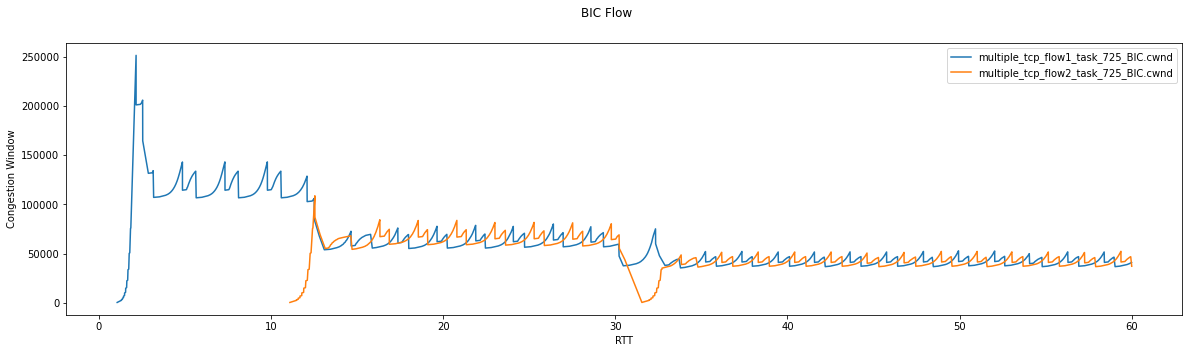

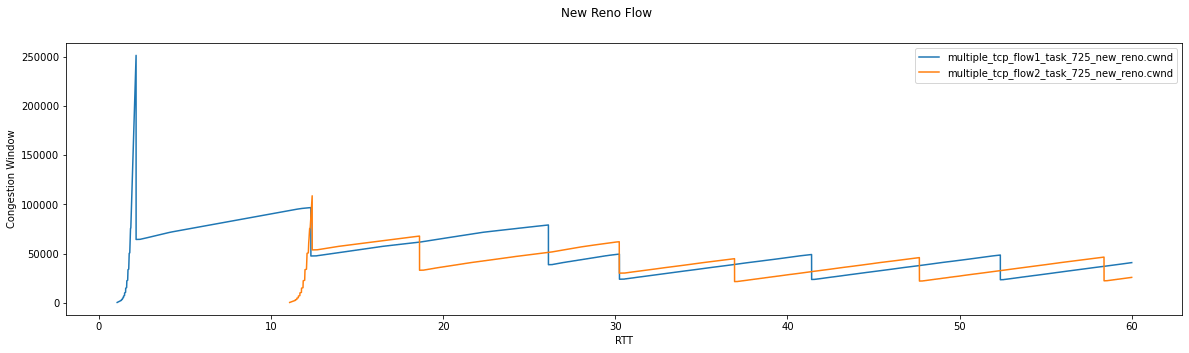

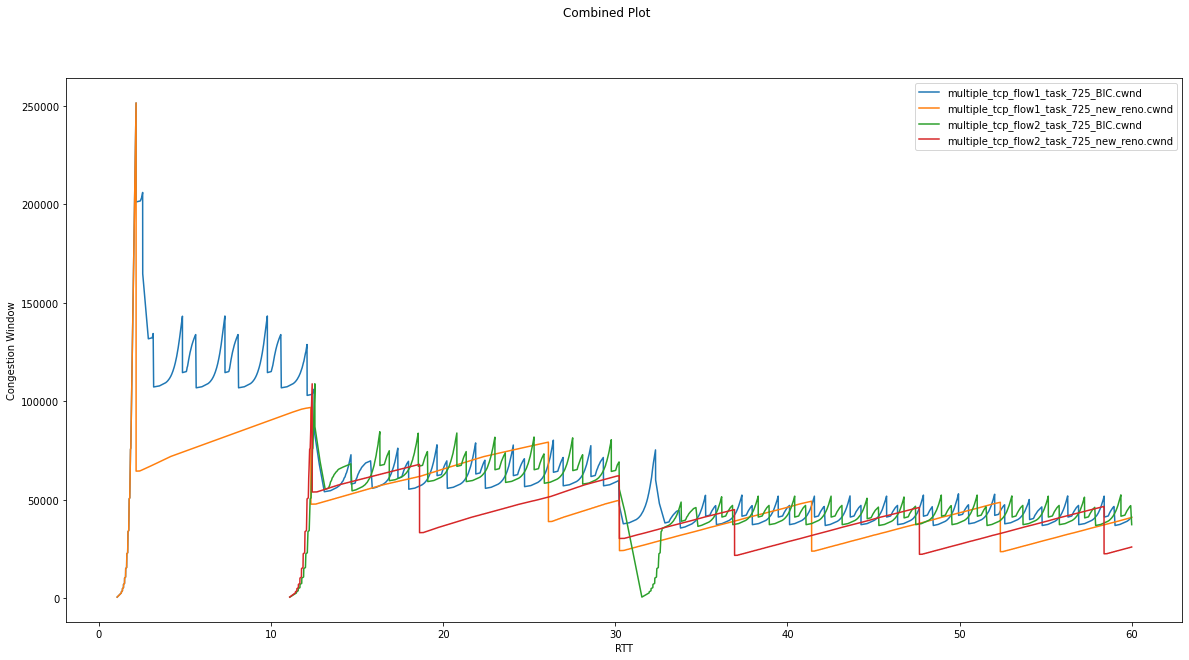

In [14]:
# Task 7.2.5: Simulation Study II

plotFlowCongestion(cwnd,bic = True, delay = True)
plotFlowCongestion(cwnd,  delay = True)
plotFlowCongestionCombined(cwnd,  delay = True) #Extra

### Task 7.2.6: BONUS: Simulation Study III

In [15]:
def CongestionUdpPlot(cwndlist, bic=False):
    plt.figure(figsize=(20, 5))
    if bic:
        plt.suptitle("BIC Flow")
        for filename, frame in cwndlist.items():
            if "726_BIC" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    else:
        plt.suptitle("New Reno Flow")
        for filename, frame in cwndlist.items():
            if "726_new_reno" in filename:
                plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    plt.xlabel("RTT")
    plt.ylabel("Congestion Window")
    plt.legend()
    
def plotFlowCongestionCombined(cwndlist):
    plt.figure(figsize=(20, 10))
    plt.suptitle("Combined Plot")
    for filename, frame in cwndlist.items():
        if "726" in filename:
            plt.plot(frame["Time"], frame["NewCwnd"], label=filename) 
    plt.xlabel("RTT")
    plt.ylabel("Congestion Window")
    plt.legend()

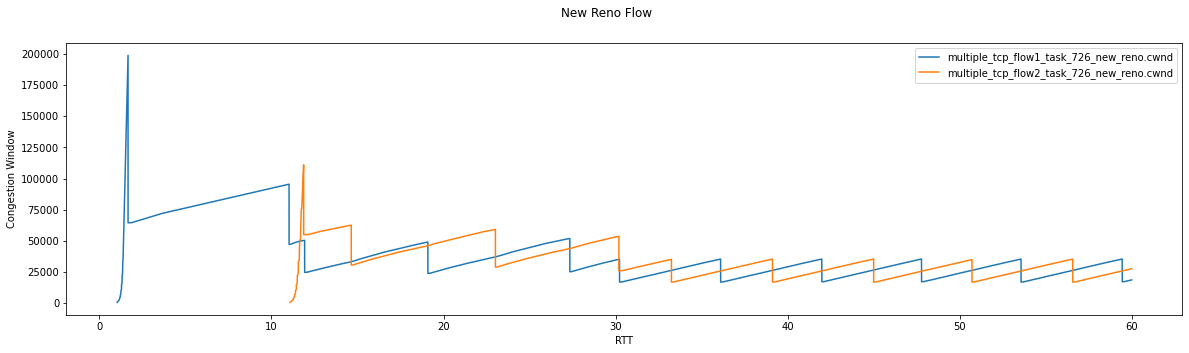

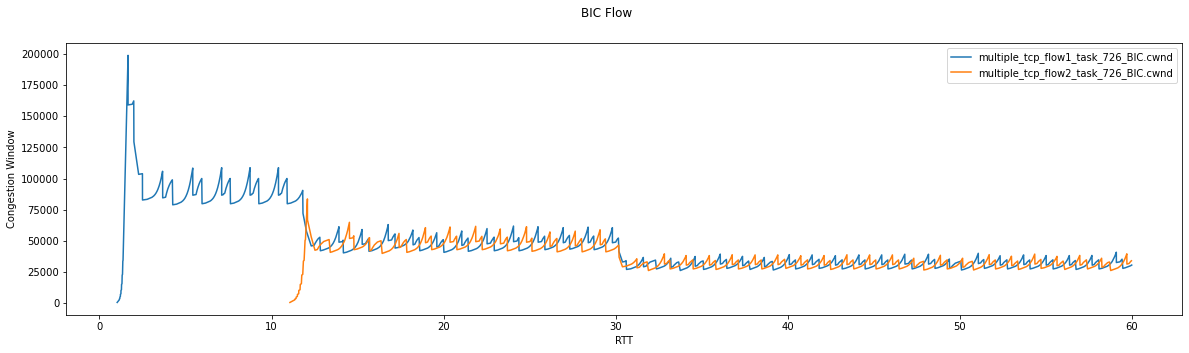

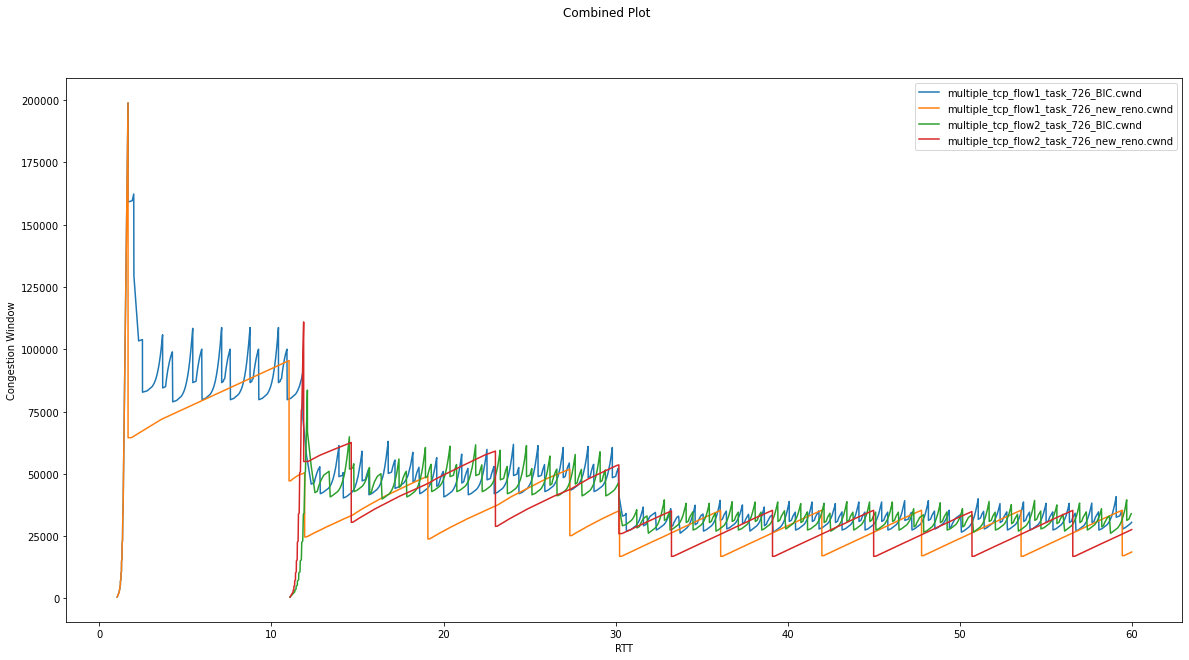

In [16]:
CongestionUdpPlot(cwnd)
CongestionUdpPlot(cwnd, True)
plotFlowCongestionCombined(cwnd)

Task 7.2.6: BONUS: Simulation Study III

When a UDP flow is added from sender 1 to receiver 1, both the variants observe larger packet drops as compared to previous results. In BIC: There is no significant changes in over all congestion window due to an added udp flow. Both flows almost maintain their congestion window as the previous readings. In New Renow: Addition of UDP has significantly reducded the Congestion window in Flow1 as can be seen by Yellow line, which reaches nearly to 25000 window size. This is perhaps due to ability of BIC to predict the best congestion window earlier and having slow increment in window size